In [1]:
import numpy as np
import matplotlib.pyplot as plt


from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import BatchNormalization 

from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
# Use GPU

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [2]:
NUM_CLASSES = 10


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
input_layer = Input((32,32,3))

# I think this layer means we want to have 32, 3x3 filters
# and we will step 1 pixel between filters. (does this wrap around?)
x = Conv2D(filters=32, kernel_size = 3,
          strides=1, padding='same')(input_layer)

# Normalize to keep network weights withing an ok range - 
#  no exploding gradients where values get really large
x = BatchNormalization()(x)

# Activation function
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size = 3,
          strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size = 3,
          strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters=64, kernel_size = 3,
          strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# take our matrix and smoosh to a vector
x = Flatten()(x)


x = Dense(128)(x)

x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x) # switch off a few neurons to force network to generalize


x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [9]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


W0824 15:23:49.995997 140156610869056 deprecation_wrapper.py:119] From /home/ian/anaconda3/envs/generative/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.6155 - acc: 0.7844
Epoch 2/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.5923 - acc: 0.7922: 0s - loss: 0.5922 - acc
Epoch 3/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.5649 - acc: 0.8011
Epoch 4/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5465 - acc: 0.8065
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5210 - acc: 0.8161
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5005 - acc: 0.8228
Epoch 7/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4756 - acc: 0.8321
Epoch 8/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4551 - acc: 0.8389
Epoch 9/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4444 - acc: 0.8424
Epoch 10/10
50000/50000 [==============================] - 52s 1ms/step - l

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 285us/step


[0.8650945912361145, 0.7258]

In [13]:
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
])

In [14]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [15]:
preds.shape

(10000, 10)

In [16]:
import matplotlib.pyplot as plt

In [17]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

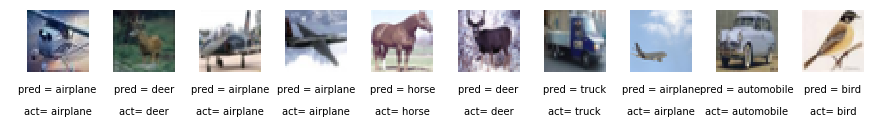

In [19]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
  
    ax.axis('off')

    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act= ' + str(actual_single[idx]), fontsize=10,
           ha='center', transform=ax.transAxes)
    ax.imshow(img)

### Sweet!